# Decision tree

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('diabetes_na.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1
1,NaN,85,66,29.0,0,26.6,0.351,NaN,0
2,8.0,183,64,0.0,0,NaN,0.672,32.0,1
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
4,0.0,137,40,35.0,168,43.1,2.288,33.0,1


In [5]:
data.isna().sum()

Pregnancies                 2
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     0
BMI                         1
DiabetesPedigreeFunction    0
Age                         1
Outcome                     0
dtype: int64

In [8]:
data=data.fillna(method='bfill')
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1
1,8.0,85,66,29.0,0,26.6,0.351,32.0,0


In [6]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

<Axes: ylabel='count'>

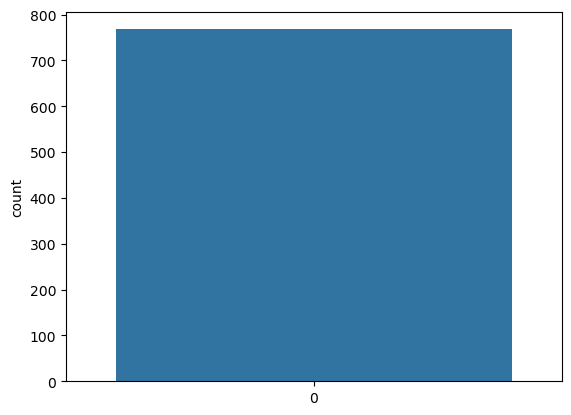

In [10]:
sns.countplot(data['Outcome'])

# Split the data for training & testing

In [11]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)
print('Training data-x - shape:\t',xtrain.shape)
print()
print('Training data-y - shape:\t',ytrain.shape)
print()
print('Testing data shape\n')
print('testing data(x-input) shape :\t',xtest.shape)
print()
print('testing data(y-Outcome) shape :\t',ytest.shape)

Training data-x - shape:	 (614, 8)

Training data-y - shape:	 (614,)

Testing data shape

testing data(x-input) shape :	 (154, 8)

testing data(y-Outcome) shape :	 (154,)


# Build the Decision Tree model with criterion =
GINI index method


In [16]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
print('dec tree mod')
print('*'*100)
print('\n train phase')
dt_clf.fit(xtrain,ytrain)
print('hyperper',dt_clf.get_params())
print('train cmp')
print('='*100)
print('\n test phae')
ypred=dt_clf.predict(xtest)
print('prdt cls lable for samples:\n',ypred)
print()
print('test complt')
print('='*100)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('dec tree - prefr measr')
print('*'*100)

print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print('='*100)
print('Confussinon matrix:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classificatino report: \n',classification_report(ytest,ypred))
print('*'*100)

dec tree mod
****************************************************************************************************

 train phase
hyperper {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
train cmp

 test phae
prdt cls lable for samples:
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 1 0]

test complt
****************************************************************************************************
dec tree - prefr measr
**********************************************************************************

# entropy index method

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy')
print('dec tree mod')
print('*'*100)
print('\n train phase')
dt_clf.fit(xtrain,ytrain)
print('hyperper',dt_clf.get_params())
print('train cmp')
print('='*100)
print('\n test phae')
ypred=dt_clf.predict(xtest)
print('prdt cls lable for samples:\n',ypred)
print()
print('test complt')
print('='*100)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('dec tree - prefr measr')
print('*'*100)

print('Accuracy Score:\t\n',accuracy_score(ytest,ypred))
print('='*100)
print('Confussinon matrix:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classificatino report: \n',classification_report(ytest,ypred))
print('*'*100)

dec tree mod
****************************************************************************************************

 train phase
hyperper {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
train cmp

 test phae
prdt cls lable for samples:
 [0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0
 0 0 0 1 1 0]

test complt
****************************************************************************************************
dec tree - prefr measr
*******************************************************************************

# Build the Decision Tree model with max_depth

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid={ 'max_depth':[None,3,4,5,6,7,8,10]}
clf=DecisionTreeClassifier(criterion='entropy')
grid_search=GridSearchCV(clf,param_grid,cv=5)
grid_search.fit(xtrain,ytrain)
best_max_depth=grid_search.best_params_['max_depth']
print(best_max_depth)


3


In [19]:
grid_search.best_params_

{'max_depth': 3}

In [20]:
grid_search.cv_results_

{'mean_fit_time': array([0.00671477, 0.00359716, 0.00323343, 0.00399752, 0.00499759,
        0.00599732, 0.00498981, 0.00599837]),
 'std_fit_time': array([2.49233076e-03, 4.94197113e-04, 2.21847521e-03, 1.99876526e-03,
        2.24167229e-05, 2.00096788e-03, 1.58015230e-05, 1.99735661e-03]),
 'mean_score_time': array([0.00220408, 0.00156007, 0.00199137, 0.00299859, 0.00199904,
        0.        , 0.00100641, 0.00199733]),
 'std_score_time': array([0.00161037, 0.00046365, 0.00243894, 0.00244834, 0.00244832,
        0.        , 0.00201283, 0.00244622]),
 'param_max_depth': masked_array(data=[None, 3, 4, 5, 6, 7, 8, 10],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': None},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 10}],
 'split0_test_score': array([0.71544715, 0.69918699, 0.70731707, 0.682

In [21]:
grid_search.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
grid_search.best_index_

1

In [23]:
grid_search.classes_

array([0, 1], dtype=int64)

In [24]:
grid_search.cv

5

In [25]:
grid_search.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [26]:
grid_search.n_splits_

5

In [27]:
clf.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

[Text(0.4060724431818182, 0.9666666666666667, 'x[1] <= 127.5\nentropy = 0.945\nsamples = 614\nvalue = [391, 223]'),
 Text(0.11399147727272728, 0.9, 'x[5] <= 26.45\nentropy = 0.709\nsamples = 381\nvalue = [307, 74]'),
 Text(0.045454545454545456, 0.8333333333333334, 'x[5] <= 9.1\nentropy = 0.133\nsamples = 108\nvalue = [106, 2]'),
 Text(0.03409090909090909, 0.7666666666666667, 'x[7] <= 28.0\nentropy = 0.764\nsamples = 9\nvalue = [7, 2]'),
 Text(0.022727272727272728, 0.7, 'x[0] <= 6.5\nentropy = 0.544\nsamples = 7\nvalue = [7, 0]'),
 Text(0.011363636363636364, 0.6333333333333333, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.03409090909090909, 0.6333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.045454545454545456, 0.7, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.056818181818181816, 0.7666666666666667, 'entropy = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(0.1825284090909091, 0.8333333333333334, 'x[7] <= 28.5\nentropy = 0.832\nsamples = 273\nvalue

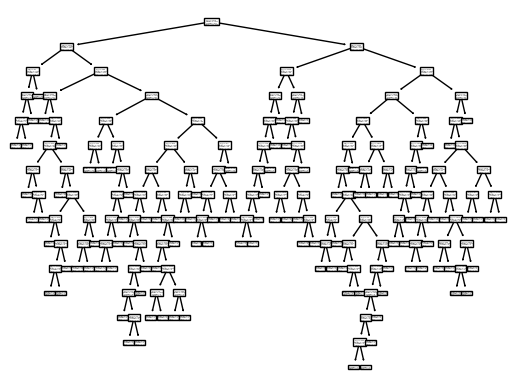

In [28]:
from sklearn import tree
tree.plot_tree(dt_clf)

[Text(0.4060724431818182, 0.9666666666666667, 'x[1] <= 127.5\nentropy = 0.945\nsamples = 614\nvalue = [391, 223]'),
 Text(0.11399147727272728, 0.9, 'x[5] <= 26.45\nentropy = 0.709\nsamples = 381\nvalue = [307, 74]'),
 Text(0.045454545454545456, 0.8333333333333334, 'x[5] <= 9.1\nentropy = 0.133\nsamples = 108\nvalue = [106, 2]'),
 Text(0.03409090909090909, 0.7666666666666667, 'x[7] <= 28.0\nentropy = 0.764\nsamples = 9\nvalue = [7, 2]'),
 Text(0.022727272727272728, 0.7, 'x[0] <= 6.5\nentropy = 0.544\nsamples = 7\nvalue = [7, 0]'),
 Text(0.011363636363636364, 0.6333333333333333, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.03409090909090909, 0.6333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.045454545454545456, 0.7, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.056818181818181816, 0.7666666666666667, 'entropy = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(0.1825284090909091, 0.8333333333333334, 'x[7] <= 28.5\nentropy = 0.832\nsamples = 273\nvalue

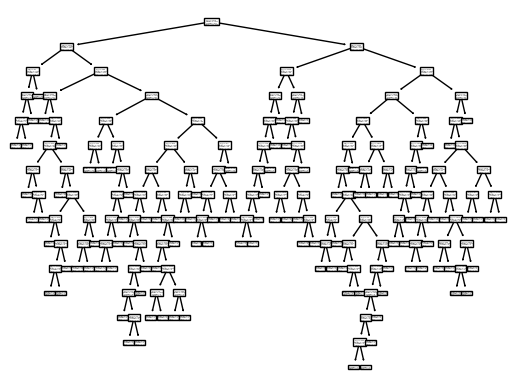

In [29]:
tree.plot_tree(dt_clf)


In [30]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy',max_depth=2)
print('*'*100)
print('Decison Tree Model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')
print('='*100)
#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('='*100)

****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0]

Testing completed
*******************************************************

[Text(0.5, 0.8333333333333334, 'x[1] <= 127.5\nentropy = 0.945\nsamples = 614\nvalue = [391, 223]'),
 Text(0.25, 0.5, 'x[5] <= 26.45\nentropy = 0.709\nsamples = 381\nvalue = [307, 74]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.133\nsamples = 108\nvalue = [106, 2]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.832\nsamples = 273\nvalue = [201, 72]'),
 Text(0.75, 0.5, 'x[5] <= 29.85\nentropy = 0.941\nsamples = 233\nvalue = [84, 149]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.944\nsamples = 58\nvalue = [37, 21]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.839\nsamples = 175\nvalue = [47, 128]')]

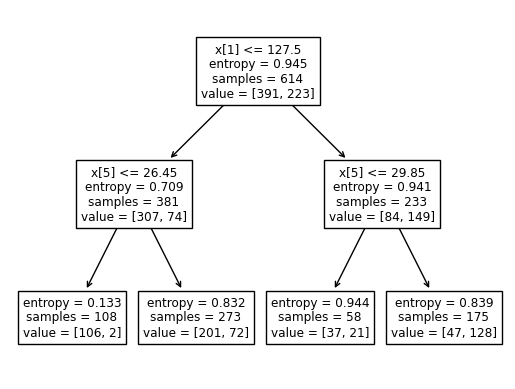

In [31]:
tree.plot_tree(dt_clf)

In [34]:
from sklearn import tree
import graphviz

In [33]:
!pip install graphviz

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     -------- ------------------------------- 10.2/47.0 kB ? eta -:--:--
     ------------------------ ------------- 30.7/47.0 kB 220.2 kB/s eta 0:00:01
     --------------------------------- ---- 41.0/47.0 kB 281.8 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 235.9 kB/s eta 0:00:00


In [35]:
dt_clf.feature_names_in_


array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [36]:
col_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
type(col_names)

list

In [37]:
label_names=['0','1']
label_names

['0', '1']

In [38]:
from sklearn import tree
import graphviz

# Assuming dt_clf is your decision tree classifier and col_names contains feature names

dot_data = tree.export_graphviz(
    dt_clf,
    feature_names=col_names,
    class_names=['0', '1'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)

# To render the decision tree and save as a file (uncomment the line below)
graph.render('DT_tree')

# To view the decision tree in a window (uncomment the line below)
graph.view()


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH